In [1]:
import numpy as np
import time

# Parametros del la simulación
n_3     = 0.1
divisor = 40
        
#Diametro de las particulas 
sigma_3 = 1.0
sigma_1 = 10.0  * sigma_3
        
# Dimensiones del sistema
delta_x = sigma_3/divisor
        
# Elementos del mallado
x       = np.arange( - sigma_1/2 - 3*sigma_3 , sigma_1/2 + 6*sigma_3 , delta_x)
y       = np.arange( - sigma_1/2 - 3*sigma_3 , sigma_1/2 + 4*sigma_3 , delta_x)

# Arrays del mallado
xx, yy  = np.meshgrid(x, y, sparse=False)
r       = np.linspace(0,3.0,31)

# Ubicación del circulo 1
X_1      = np.array([0,0])

In [ ]:
# Parametros de la primer corrida
sigma_2 = 10.0  * sigma_3
dEC     = np.linspace(1,9,5)* sigma_3 # Distancia del centro del hueco

In [19]:
# Verificar velocidad de ejecución
inicio = time.time()

#Inicializar donde se guardara el número de traslapes
num_tras = np.zeros((len(dEC),len(r)))

#Calcular iterativamente todos los valores de los traslapes
for j in range(len(dEC)):
    for i in range(len(r)):
        # Centro del hueco
        X_h           = X_1 + np.array([dEC[j],0])

        # Ubicación de las esferas 1
        X_2           = X_h + r[i] * np.array([sigma_3,0])
                      
        # Radio del hueco 
        R_1           = sigma_2 / 2
                      
        #Arrays con la distancia entre las esferas y cada punto del mallado
        d1            = np.sqrt( (X_1[0]-xx)**2 + (X_1[1]-yy)**2 )
                      
        # Filtros que identifican si el disco de referencia intersecta el disco 1 y no esta totalmente dentro del hueco
        ######################################################################################################
        mask_1        = d1 <= (sigma_1+sigma_3)/2                                                            #
        del(d1)    # Eliminar un gran array para ahorrar memoria                                             #
                                                                                                             #
        #Repetir para el hueco                                                                               #
        dh            = np.sqrt( (X_h[0]-xx)**2 + (X_h[1]-yy)**2 )                                           #
        mask_h        = dh >   R_1 - sigma_3/2      # Solo aceptamos los puntos que no estén en el hueco     # 
        del(dh)    # Eliminar un gran array para ahorrar memoria                                             #
        ######################################################################################################

        #Corrección para evitar sobreestimación
        ######################################################################################################
        #Cálcular la posición del <<borde>> de la cerradura                                                  #
        corner_x      = ( 4*dEC[j]**2 + sigma_1**2 - sigma_2**2 + 8*dEC[j]*X_1[0] ) /(8*dEC[j])              #
        corner_y_1    = + np.sqrt((sigma_1/2)**2-(X_1[0]-corner_x)**2)-X_1[1]                                #
        corner_y_2    = - np.sqrt((sigma_1/2)**2-(X_1[0]-corner_x)**2)-X_1[1]                                #
                                                                                                             #
        #Cálcular la distancia entre la esfera de referencia y el <<borde>>                                  #
        d_c_1         = (corner_x - xx)**2 + (corner_y_1 - yy)**2                                            #
        d_c_2         = (corner_x - xx)**2 + (corner_y_2 - yy)**2                                            #
                                                                                                             #
        #Filtro que elimina los traslapes luego del <<borde>> pero incluye los que lo tocan                  #
        mask_c        = xx < corner_x                                                                        #
        mask_c_1      = d_c_1 <=  (sigma_3/2)**2                                                             #
        mask_c_2      = d_c_2 <=  (sigma_3/2)**2                                                             #
        del(d_c_1,d_c_2)    # Eliminar un gran array para ahorrar memoria                                    #
                                                                                                             #
        mask_c_t      = ( mask_c | mask_c_1 ) |  mask_c_2                                                    #
        del(mask_c,mask_c_1,mask_c_2)    # Eliminar un gran array para ahorrar memoria                       #
        ######################################################################################################
        
        #Detectar traslape con la llave
        ######################################################################################################
        d2            = np.sqrt( (X_2[0]-xx)**2 + (X_2[1]-yy)**2 )                                           #
        mask_2        = d2 <= (sigma_2+sigma_3)/2                                                            #
                                                                                                             #
        del(d2)       # Eliminar un gran array para ahorrar memoria                                          #
        ######################################################################################################
        
        #Filtro final
        mask  = (mask_1 & mask_2) & (mask_h & mask_c_t)

        #Si el hueco es más grande el disco 1, no puede haber traslapes
        if (3/2)*sigma_1-dEC[j] <= R_1:
            mask = np.array(False)
        
        # Número de elementos con traslape de ambas esferas
        num_tras[j,i] = len(mask[mask])
        del(mask_2)


# Medir cuanto dura el proceso con finalidades de optimización
fin = time.time()
print(fin-inicio) 


# Guardar los resultados en un documento csv
beta_u_ef =  -num_tras*n_3*(delta_x**2)
np.savetxt("beta_u_llave_cerradura_2D_delta_x_"+str(divisor)+"_dEC.csv", beta_u_ef, delimiter=",")

11.014329195022583


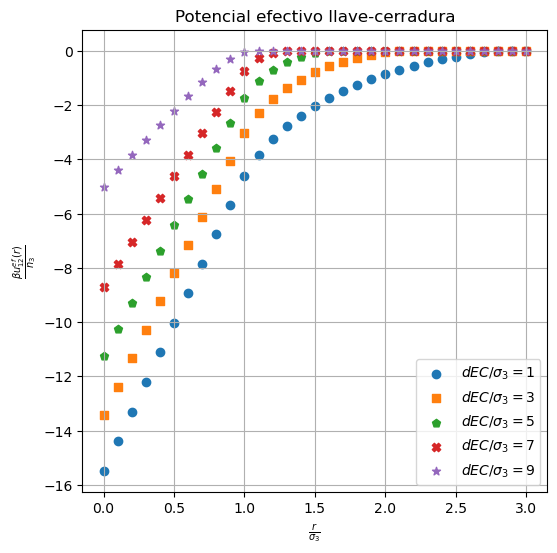

In [20]:
import matplotlib.pyplot as plt

beta_u_ef = np.loadtxt("beta_u_llave_cerradura_2D_delta_x_40_dEC.csv",
				                 delimiter=",")/n_3

    
fig, ax = plt.subplots(figsize=[6, 6])

markers = ['o','s','p',"X","*"]
for j in range(len(dEC)):
    ax.scatter( r, beta_u_ef[j], label=r'$dEC/\sigma_3=$'+str(int(dEC[j])), marker= markers[j])
   
ax.set_title('Potencial efectivo llave-cerradura')
ax.set_ylabel(r'$\frac{\beta u_{12}^{ef}(r)}{n_3}$')
ax.set_xlabel(r'$\frac{r}{\sigma_3}$')
ax.legend()
ax.grid(True)
plt.savefig("Grafico_llave_cerradura_2D_dEC.png", dpi=500)
plt.show()

In [ ]:
# Parametros de la segunda corrida
dEC     = 5.0  * sigma_3
sigma_2 = np.linspace(4,20,5)* sigma_3 

In [2]:
# Verificar velocidad de ejecución
inicio = time.time()

#Inicializar donde se guardara el número de traslapes
num_tras = np.zeros((len(sigma_2),len(r)))

#Calcular iterativamente todos los valores de los traslapes
for j in range(len(sigma_2)):
    for i in range(len(r)):
        # Centro del hueco
        X_h           = X_1 + np.array([dEC,0])

        # Ubicación de las esferas 1
        X_2           = X_h + r[i] * np.array([sigma_3,0])
                      
        # Radio del hueco 
        R_1           = sigma_2[j] / 2

        #Si el hueco es más grande el disco 1, no puede haber traslapes
        if (3/2)*sigma_1-dEC <= R_1:
            mask = np.array(False)
        else:      
            #Arrays con la distancia entre las esferas y cada punto del mallado
            d1            = np.sqrt( (X_1[0]-xx)**2 + (X_1[1]-yy)**2 )
            
            # Filtros que identifican si el disco de referencia intersecta el disco 1 y no esta totalmente dentro del hueco
            ######################################################################################################
            mask_1        = d1 <= (sigma_1+sigma_3)/2                                                            #
            del(d1)    # Eliminar un gran array para ahorrar memoria                                             #
                                                                                                                 #
            #Repetir para el hueco                                                                               #
            dh            = np.sqrt( (X_h[0]-xx)**2 + (X_h[1]-yy)**2 )                                           #
            mask_h        = dh >   R_1 - sigma_3/2      # Solo aceptamos los puntos que no estén en el hueco     # 
            del(dh)    # Eliminar un gran array para ahorrar memoria                                             #
            ######################################################################################################
    
            #Corrección para evitar sobreestimación
            ######################################################################################################
            #Cálcular la posición del <<borde>> de la cerradura                                                  #
            corner_x      = ( 4*dEC**2 + sigma_1**2 - sigma_2[j]**2 + 8*dEC*X_1[0] ) /(8*dEC)                    #
            corner_y_1    = + np.sqrt( (sigma_1/2)**2 - (X_1[0]-corner_x)**2)-X_1[1]                             #
            corner_y_2    = - np.sqrt( (sigma_1/2)**2 - (X_1[0]-corner_x)**2)-X_1[1]                             #
                                                                                                                 #
            #Cálcular la distancia entre la esfera de referencia y el <<borde>>                                  #
            d_c_1         = (corner_x - xx)**2 + (corner_y_1 - yy)**2                                            #
            d_c_2         = (corner_x - xx)**2 + (corner_y_2 - yy)**2                                            #
                                                                                                                 #
            #Filtro que elimina los traslapes luego del <<borde>> pero incluye los que lo tocan                  #
            mask_c        = xx < corner_x                                                                        #
            mask_c_1      = d_c_1 <=  (sigma_3/2)**2                                                             #
            mask_c_2      = d_c_2 <=  (sigma_3/2)**2                                                             #
            del(d_c_1,d_c_2)    # Eliminar un gran array para ahorrar memoria                                    #
                                                                                                                 #
            mask_c_t      = ( mask_c | mask_c_1 ) |  mask_c_2                                                    #
            del(mask_c,mask_c_1,mask_c_2)    # Eliminar un gran array para ahorrar memoria                       #
            ######################################################################################################
            
            #Detectar traslape con la llave
            ######################################################################################################
            d2            = np.sqrt( (X_2[0]-xx)**2 + (X_2[1]-yy)**2 )                                           #
            mask_2        = d2 <= (sigma_2[j]+sigma_3)/2                                                         #
                                                                                                                 #
            del(d2)       # Eliminar un gran array para ahorrar memoria                                          #
            ######################################################################################################
            
            #Filtro final
            mask  = (mask_1 & mask_2) & (mask_h & mask_c_t)
        
        # Número de elementos con traslape de ambas esferas
        num_tras[j,i] = len(mask[mask])


# Medir cuanto dura el proceso con finalidades de optimización
fin = time.time()
print(fin-inicio) 


# Guardar los resultados en un documento csv
beta_u_ef =  -num_tras*n_3*(delta_x**2)
np.savetxt("beta_u_llave_cerradura_2D_delta_x_"+str(divisor)+"_sigma_2.csv", beta_u_ef, delimiter=",")

12.661638021469116


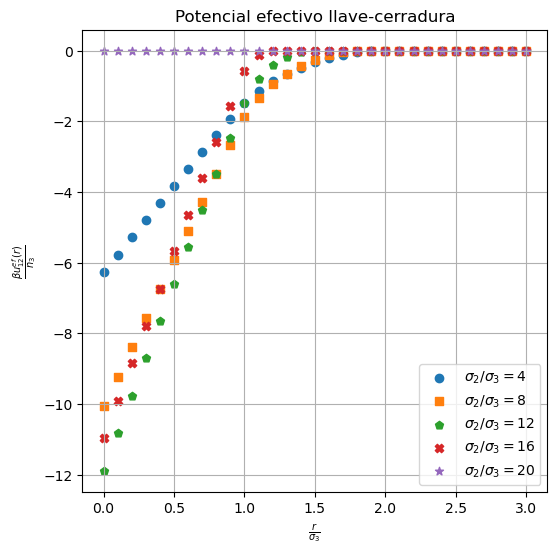

In [4]:
import matplotlib.pyplot as plt
beta_u_ef = np.loadtxt("beta_u_llave_cerradura_2D_delta_x_40_sigma_2.csv",
				                 delimiter=",")/n_3

    
fig, ax = plt.subplots(figsize=[6, 6])

markers = ['o','s','p',"X","*"]
for j in range(len(sigma_2)):
    ax.scatter( r, beta_u_ef[j], label=r'$\sigma_2/\sigma_3=$'+str(int(sigma_2[j])), marker= markers[j])
   
ax.set_title('Potencial efectivo llave-cerradura')
ax.set_ylabel(r'$\frac{\beta u_{12}^{ef}(r)}{n_3}$')
ax.set_xlabel(r'$\frac{r}{\sigma_3}$')
ax.legend()
ax.grid(True)
plt.savefig("Grafico_llave_cerradura_2D_sigma_2.png", dpi=500)
plt.show()